In [21]:
import kaggle
import streamlit as st
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
# Importing databases

!kaggle datasets download --file Airplane_Crashes_and_Fatalities_Since_1908_20190820105639.csv -d cgurkan/airplane-crash-data-since-1908
!kaggle datasets download --file Aircraft_Incident_Dataset.csv -d deepcontractor/aircraft-accidents-failures-hijacks-dataset

Airplane_Crashes_and_Fatalities_Since_1908_20190820105639.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
Aircraft_Incident_Dataset.csv.zip: Skipping, found more recently modified local copy (use --force to force download)


In [23]:
import zipfile
z1= zipfile.ZipFile('Aircraft_Incident_Dataset.csv.zip')
z1.extractall()

z2 = zipfile.ZipFile('Airplane_Crashes_and_Fatalities_Since_1908_20190820105639.csv.zip')
z2.extractall()

## Explore datasets

### Crashes

In [24]:
crashes = pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908_20190820105639.csv')
crashes

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,09/07/1909,NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,07/12/1912,06:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4962,04/16/2019,11:00,"Puerto Montt, Chile",Archipelagos Service Aereos,NaN,Puerto Montt - Ayacara,Pilatus-Britten Norman BN-2B-27 Islander,CC-CYR,2169,6.0,5.0,1.0,6.0,5.0,1.0,0.0,"While the aircraft was in the initial climb, p..."
4963,05/05/2019,18:30,"Near Monclava, Mexico",TVPX Aircraft Solutions,NaN,Las Vegas - Monterrey,Canadair CL-600-2B16-Challenger,N601VH,5043,13.0,11.0,2.0,13.0,11.0,2.0,0.0,The aircraft crashed while en route on a retur...
4964,05/05/2019,18:30,"Moscow, Russia",Aeroflot Russian International Airlines,NaN,Moscow - Murmansk,Sukhoi Superjet-100-95B,RA-89098,95135,78.0,73.0,5.0,41.0,40.0,1.0,0.0,Forty-five minutes after taking off from Mosco...
4965,06/03/2019,13:00,"Near Lipo, India",Military - Indian Air Force,NaN,Jorhat-Rowriah - Mechuka,Antonov An-32,K2752,1009,13.0,5.0,8.0,13.0,5.0,8.0,0.0,Crashed about 34km WNW of Mechuka.


The aviation accident database throughout the world, from 1908-2019.

- All civil and commercial aviation accidents of scheduled and non-scheduled passenger airliners worldwide, which resulted in a fatality (including all U.S. Part 121 and Part 135 fatal accidents)
- All cargo, positioning, ferry and test flight fatal accidents.
- All military transport accidents with 10 or more fatalities.
- All commercial and military helicopter accidents with greater than 10 fatalities.
- All civil and military airship accidents involving fatalities.
- Aviation accidents involving the death of famous people.
- Aviation accidents or incidents of noteworthy interest.

In [6]:
crashes.shape

(4967, 17)

In [7]:
crashes.isnull().sum()

Date                        0
Time                     1510
Location                    4
Operator                   10
Flight #                 3652
Route                     774
AC Type                    15
Registration              273
cn/ln                     668
Aboard                     18
Aboard Passangers         229
Aboard Crew               226
Fatalities                  8
Fatalities Passangers     242
Fatalities Crew           241
Ground                     41
Summary                    64
dtype: int64

In [8]:
crashes.describe()

,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground
count,4949.000000,4738.000000,4741.000000,4959.000000,4725.000000,4726.000000,4926.000000
mean,31.088301,26.898691,4.479646,22.338173,19.017566,3.579348,1.728177
std,45.438282,44.010591,3.489021,35.026176,34.114849,3.170223,55.708966
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,3.000000,2.000000,4.000000,1.000000,2.000000,0.000000
50%,16.000000,12.000000,4.000000,11.000000,8.000000,3.000000,0.000000
75%,35.000000,30.000000,6.000000,25.000000,21.000000,5.000000,0.000000
max,644.000000,614.000000,61.000000,583.000000,560.000000,46.000000,2750.000000


### Accidents, failures & hijacks

In [25]:
accidents = pd.read_csv('Aircraft_Incident_Dataset.csv')
accidents

,Incident_Date,Aircaft_Model,Aircaft_Registration,Aircaft_Operator,Aircaft_Nature,Incident_Category,Incident_Cause(es),Incident_Location,Aircaft_Damage_Type,Date,...,Onboard_Crew,Onboard_Passengers,Onboard_Total,Fatalities,Aircaft_First_Flight,Aircraft_Phase,Departure_Airport,Destination_Airport,Ground_Casualties,Collision_Casualties
0,03-JAN-2022,British Aerospace 4121 Jetstream 41,ZS-NRJ,SA Airlink,Domestic Non Scheduled Passenger,Accident | repairable-damage,"Airplane - Engines, Airplane - Engines - Prop/...",near Venetia Mine...,Substantial,Monday 3 January 2022,...,Fatalities: 0 / Occupants: 3,Fatalities: 0 / Occupants: 4,Fatalities: 0 / Occupants: 7,0,1995-05-19 (26 years 8 months),Landing (LDG),Johannesburg-O.R. Tambo International Airport ...,"Venetia Mine Airport (FAVM) , South Africa",NaN,NaN
1,04-JAN-2022,British Aerospace 3101 Jetstream 31,HR-AYY,LANHSA,Domestic Scheduled Passenger,Accident | repairable-damage,"Airplane - Undercarriage, Airplane - Undercarr...",Roatán-Juan ...,Substantial,Tuesday 4 January 2022,...,Fatalities: 0 / Occupants:,Fatalities: 0 / Occupants:,Fatalities: 0 / Occupants: 19,0,1985,Landing (LDG),La Ceiba-Goloson International Airport (LCE/MH...,Roatán-Juan Manuel Gálvez International Airpor...,NaN,NaN
2,05-JAN-2022,Boeing 737-4H6,EP-CAP,Caspian Airlines,Domestic Scheduled Passenger,Accident | repairable-damage,"Airplane - Undercarriage, Airplane - Undercarr...",Isfahan-Shah...,Substantial,Wednesday 5 January 2022,...,Fatalities: 0 / Occupants:,Fatalities: 0 / Occupants:,Fatalities: 0 / Occupants: 116,0,1992-09-18 (29 years 4 months),Landing (LDG),"Mashhad Airport (MHD/OIMM) , Iran","Isfahan-Shahid Beheshti Airport (IFN/OIFM) , Iran",NaN,NaN
3,08-JAN-2022,Tupolev Tu-204-100C,RA-64032,"Cainiao, opb Aviastar-TU",Cargo,Accident | hull-loss,"Cargo - Fire/smoke, Result - Damaged on the gr...",Hangzhou-Xia...,Destroyed,Saturday 8 January 2022,...,Fatalities: 0 / Occupants: 8,Fatalities: 0 / Occupants: 0,Fatalities: 0 / Occupants: 8,0,2002-07-18 (19 years 6 months),Standing (STD),Hangzhou-Xiaoshan International Airport (HGH/Z...,"Novosibirsk-Tolmachevo Airport (OVB/UNNT) , Ru...",NaN,NaN
4,12-JAN-2022,Beechcraft 200 Super King Air,NaN,private,Illegal Flight,"Criminal occurrence (sabotage, shoot down) | h...",Result - Damaged on the ground,"Machakilha, ...",Damaged beyond repair,Wednesday 12 January 2022,...,Fatalities: 0 / Occupants: 0,Fatalities: 0 / Occupants: 0,Fatalities: 0 / Occupants: 0,0,NaN,Standing (STD),?,?,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23514,25-FEB-1920,Handley Page O/400,G-EAMC,Handley Page Transport,Unknown,Accident | hull-loss,"Result - Emergency, forced landing - Outside a...",near El Shereik,Damaged beyond repair,Wednesday 25 February 1920,...,Fatalities: 0 / Occupants: 4,Fatalities: 0 / Occupants: 0,Fatalities: 0 / Occupants: 4,0,NaN,Unknown (UNK),"Aswan Airport (ASW/HESN) , Egypt","Khartoum-Civil Airport (KRT/HSSS) , Sudan",NaN,NaN
23515,30-JUN-1920,Handley Page O/400,G-EAKE,Handley Page Transport,Demonstration,Accident | hull-loss,"Result - Emergency, forced landing - Outside a...",Östanå,Damaged beyond repair,Wednesday 30 June 1920,...,Fatalities: 0 / Occupants: 2,Fatalities: 0 / Occupants: 0,Fatalities: 0 / Occupants: 2,0,1919,En route (ENR),"Stockholm (unknown airport) , Sweden","Kjeller Air Base (ENKJ) , Norway",NaN,NaN
23516,14-DEC-1920,Handley Page O/400,G-EAMA,Handley Page Transport,International Scheduled Passenger,Accident | hull-loss,Result - CFIT - Level ground,Golders Green,Damaged beyond repair,Tuesday 14 December 1920,...,Fatalities: 2 / Occupants: 2,Fatalities: 2 / Occupants: 6,Fatalities: 4 / Occupants: 8,4,NaN,Initial climb (ICL),"London-Cricklewood Aerodrome , United Kingdom","Paris-Le Bourget Airport (LBG/LFPB) , France",NaN,NaN
23517,02-AUG-1919,Caproni Ca.48,NaN,Caproni,Passenger,Accident | hull-loss,Info-Unavailable,Verona,Destroyed,Saturday 2 August 1919,...,Fatalities: 2 / Occupants: 2,Fatalit

Worldwide accidents and hijackings involving airliners (12+ passengers), corporate jets and military transport aircraft since 1919.

In [26]:
accidents.isnull().sum()

Incident_Date               0
Aircaft_Model               0
Aircaft_Registration     1561
Aircaft_Operator            0
Aircaft_Nature              0
Incident_Category           0
Incident_Cause(es)          0
Incident_Location         932
Aircaft_Damage_Type         0
Date                        0
Time                    14316
Arit                        0
Aircaft_Engines         12883
Onboard_Crew                0
Onboard_Passengers          0
Onboard_Total               0
Fatalities                  0
Aircaft_First_Flight     5488
Aircraft_Phase              0
Departure_Airport           0
Destination_Airport         0
Ground_Casualties       23172
Collision_Casualties    23227
dtype: int64

In [27]:
accidents.describe()

,Fatalities
count,23519.000000
mean,5.611931
std,22.205937
min,0.000000
25%,0.000000
50%,0.000000
75%,4.000000
max,1692.000000


## Initial data filtering

In [28]:
crashes.drop(['Flight #', 'cn/ln', 'Summary'], axis = 1, inplace = True)

In [29]:
crashes.head()

,Date,Time,Location,Operator,Route,AC Type,Registration,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,NaN,2.0,1.0,1.0,1.0,1.0,0.0,0.0
1,09/07/1909,NaN,"Juvisy-sur-Orge, France",NaN,Air show,Wright Byplane,SC1,1.0,0.0,1.0,1.0,0.0,0.0,0.0
2,07/12/1912,06:30,"Atlantic City, New Jersey",Military - U.S. Navy,Test flight,Dirigible,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0
3,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,NaN,Curtiss seaplane,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0
4,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,Zeppelin L-1 (airship),NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0


In [14]:
accidents.drop(['Incident_Date', 'Aircaft_Model', 'Aircaft_Operator', 'Incident_Location', 'Date', 'Onboard_Crew', 'Onboard_Passengers', 'Onboard_Total', 'Fatalities', 'Departure_Airport', 'Destination_Airport', 'Ground_Casualties', 'Collision_Casualties', 'Arit', 'Time'], axis = 1, inplace = True)

In [15]:
accidents.head()

,Aircaft_Registration,Aircaft_Nature,Incident_Category,Incident_Cause(es),Aircaft_Damage_Type,Aircaft_Engines,Aircaft_First_Flight,Aircraft_Phase
0,ZS-NRJ,Domestic Non Scheduled Passenger,Accident | repairable-damage,"Airplane - Engines, Airplane - Engines - Prop/...",Substantial,2 Garrett TPE331-14GR-805H,1995-05-19 (26 years 8 months),Landing (LDG)
1,HR-AYY,Domestic Scheduled Passenger,Accident | repairable-damage,"Airplane - Undercarriage, Airplane - Undercarr...",Substantial,NaN,1985,Landing (LDG)
2,EP-CAP,Domestic Scheduled Passenger,Accident | repairable-damage,"Airplane - Undercarriage, Airplane - Undercarr...",Substantial,2 CFMI CFM56-3C1,1992-09-18 (29 years 4 months),Landing (LDG)
3,RA-64032,Cargo,Accident | hull-loss,"Cargo - Fire/smoke, Result - Damaged on the gr...",Destroyed,2 Soloviev PS-90A,2002-07-18 (19 years 6 months),Standing (STD)
4,NaN,Illegal Flight,"Criminal occurrence (sabotage, shoot down) | h...",Result - Damaged on the ground,Damaged beyond repair,NaN,NaN,Standing (STD)


<AxesSubplot:>

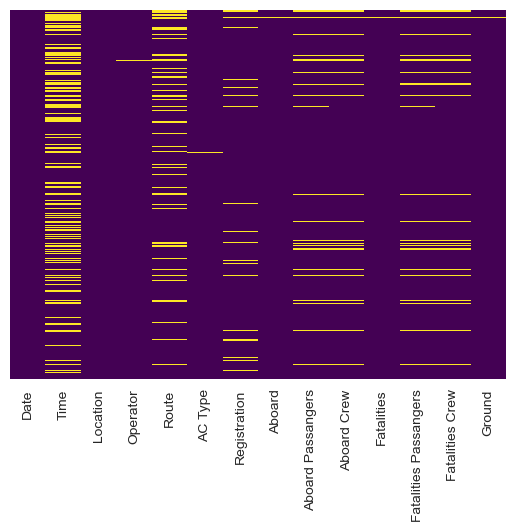

In [16]:
sns.heatmap(crashes.isnull(),yticklabels=False,cbar=False,cmap = 'viridis')

In [17]:
Registration_NaN = crashes['Registration'].isnull().sum()/len(crashes['Registration'])*100
print(str(Registration_NaN.round()) + "% of the registration is unknown (NaN)")

5.0% of the registration is unknown (NaN)
